# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [431]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from pandas_datareader import wb

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2


# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [432]:
wb_migration = wb.download(indicator='SM.POP.NETM', country=['VEN','MEX', 'AFG', 'USA', 'SSF', 'SGP', 'CHN', 'GBR', 'ESP', 'QAT', 'ROU'], start=1960, end=2019)

wb_migration = wb_migration.rename(columns = {'SM.POP.NETM':'net migration'})
wb_migration = wb_migration.reset_index()
wb_migration.sample(5)

c:\Users\m-fdu\anaconda3\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: SSF
  warnings.warn(


,country,year,net migration
3,Afghanistan,2016,-90238
505,Sub-Saharan Africa,1994,-590735
346,Qatar,1973,10298
82,China,1997,-501141
463,Singapore,1976,433


In [433]:
wb_migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        660 non-null    object
 1   year           660 non-null    object
 2   net migration  660 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 15.6+ KB


In [434]:
# convert year
wb_migration.year = wb_migration.year.astype(int) 

# convert country to the special pandas string type
wb_migration.country = wb_migration.country.astype('string') 

wb_migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        660 non-null    string
 1   year           660 non-null    int32 
 2   net migration  660 non-null    int64 
dtypes: int32(1), int64(1), string(1)
memory usage: 13.0 KB


In [435]:
wb_migration.to_csv('migration.csv', index=False)

In [436]:

wb_labour = wb.download(indicator='SL.TLF.TOTL.IN', country=['VEN','MEX', 'AFG', 'USA', 'SSF', 'SGP', 'CHN', 'GBR', 'ESP', 'QAT', 'ROU'], start=2000, end=2019)

wb_labour = wb_labour.rename(columns = {'SL.TLF.TOTL.IN':'labor_force'})
wb_labour = wb_labour.reset_index()
wb_labour.sample(5)

c:\Users\m-fdu\anaconda3\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: SSF
  warnings.warn(


,country,year,labor_force
217,"Venezuela, RB",2002,10802303
190,United States,2009,157377616
59,Spain,2000,18242081
136,Romania,2003,10032640
56,Spain,2003,19731180


In [437]:
wb_labour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      220 non-null    object
 1   year         220 non-null    object
 2   labor_force  220 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.3+ KB


In [438]:
# convert year
wb_labour.year = wb_labour.year.astype(int) 

# convert country to the special pandas string type
wb_labour.country = wb_labour.country.astype('string') 

wb_labour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      220 non-null    string
 1   year         220 non-null    int32 
 2   labor_force  220 non-null    int64 
dtypes: int32(1), int64(1), string(1)
memory usage: 4.4 KB


In [439]:
wb_labour.to_csv('labour_force.csv', index=False)

In [440]:
wb_gdp = wb.download(indicator='NY.GDP.MKTP.CD', country=['VEN','MEX', 'AFG', 'USA', 'SSF', 'SGP', 'CHN', 'GBR', 'ESP', 'QAT', 'ROU'], start=1960, end=2019)

wb_gdp = wb_gdp.rename(columns = {'NY.GDP.MKTP.CD':'gdp'})
wb_gdp = wb_gdp.reset_index()
wb_gdp.sample(5)


c:\Users\m-fdu\anaconda3\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: SSF
  warnings.warn(


,country,year,gdp
7,Afghanistan,2012,2.020357e+10
527,Sub-Saharan Africa,1972,7.739815e+10
187,United Kingdom,2012,2.706341e+12
96,China,1983,2.306867e+11
520,Sub-Saharan Africa,1979,2.219983e+11


In [441]:
# convert year
wb_gdp.year = wb_gdp.year.astype(int) 

# convert country to the special pandas string type
wb_gdp.country = wb_gdp.country.astype('string') 

wb_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  660 non-null    string 
 1   year     660 non-null    int32  
 2   gdp      598 non-null    float64
dtypes: float64(1), int32(1), string(1)
memory usage: 13.0 KB


In [442]:
wb_gdp.to_csv('gdp.csv', index=False)

In [443]:
wb = pd.merge(wb_migration, wb_gdp, how = 'outer', on = ['country','year']);
wb.head(5)

,country,year,net migration,gdp
0,Afghanistan,2019,-8082,1.890449e+10
1,Afghanistan,2018,-47205,1.841885e+10
2,Afghanistan,2017,-47090,1.889635e+10
3,Afghanistan,2016,-90238,1.801956e+10
4,Afghanistan,2015,-281739,1.999816e+10


## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

In [447]:

def plot_func(country):
    country_data = wb[wb['country'] == country]
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Net migration', color=color)
    ax1.plot(country_data['year'], country_data['net migration'], color=color)
    

    ax2 = ax1.twinx()  

    color = 'tab:purple'
    ax2.set_ylabel('gdp', color=color)  
    ax2.plot(country_data['year'], country_data['gdp'], color=color)
    

    plt.title(f'{country} Net Migration and gdp over Time')
    fig.tight_layout()  
    plt.show()

country_widget = widgets.Dropdown(options=wb['country'].unique(), description='Country:')

widgets.interact(plot_func, country=country_widget);


interactive(children=(Dropdown(description='Country:', options=('Afghanistan', 'China', 'Spain', 'United Kingd…

**Interactive plot** :

In [445]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

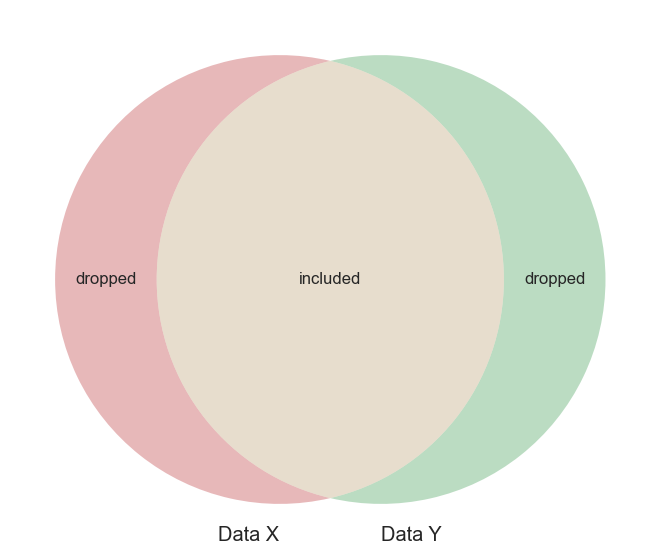

In [446]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.